### Q6 - Salary prediction based on years of experience

Input variable = X = Years of Experience
Output variable = Y = Salary 

In [33]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#Read the data
SalaryData = pd.read_csv('D:/1.0 Studies/DataScience_Excelr/Assignment6_LinearRegression/Salary_Data.csv')
SalaryData

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
SalaryData.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
SalaryData.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


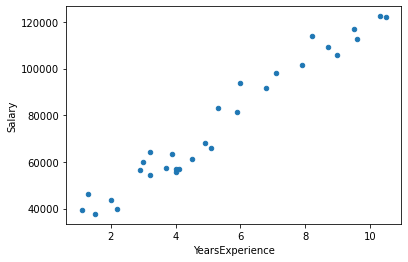

In [5]:
SalaryData.plot(kind ='scatter', x='YearsExperience', y='Salary')
plt.show()

In [6]:
#Building a model
lm = linear_model.LinearRegression()
x = np.array([SalaryData["YearsExperience"]]).reshape(-1,1)
y = np.array([SalaryData["Salary"]]).reshape(-1,1)

In [7]:
linear_model=smf.ols("Salary~YearsExperience",data=SalaryData).fit()
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [8]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 04 May 2021   Prob (F-statistic):           1.14e-20
Time:                        18:09:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Splitting the data for trainin and testing (default 25% test)

x = np.array([SalaryData["YearsExperience"]]).reshape(-1,1)
y = np.array([SalaryData["Salary"]]).reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train, y_train)

[[ 3. ]
 [ 3.9]
 [ 2. ]
 [ 7.9]
 [ 8.2]
 [ 9. ]
 [ 4. ]
 [ 2.2]
 [ 5.9]
 [ 4.5]
 [10.5]
 [ 8.7]
 [ 3.2]
 [ 4. ]
 [ 3.7]
 [ 2.9]
 [ 9.6]
 [ 3.2]
 [ 5.3]
 [ 1.1]
 [ 4.9]
 [ 7.1]] [[ 60150.]
 [ 63218.]
 [ 43525.]
 [101302.]
 [113812.]
 [105582.]
 [ 56957.]
 [ 39891.]
 [ 81363.]
 [ 61111.]
 [121872.]
 [109431.]
 [ 54445.]
 [ 55794.]
 [ 57189.]
 [ 56642.]
 [112635.]
 [ 64445.]
 [ 83088.]
 [ 39343.]
 [ 67938.]
 [ 98273.]]


In [10]:
trainmodel = lm.fit(x_train,y_train)
trainmodel.score(x_test,y_test)

0.9539935088679086

In [25]:
#Testing the model
y_pred = trainmodel.predict(x_test)
print(y_pred)

[[ 89861.25985884]
 [ 64339.91975496]
 [ 73792.26794158]
 [ 39763.81446973]
 [115382.59996273]
 [ 82299.38130954]
 [122944.47851203]
 [ 37873.34483241]]


In [12]:
print(y_test)

[[ 91738.]
 [ 57081.]
 [ 66029.]
 [ 37731.]
 [116969.]
 [ 93940.]
 [122391.]
 [ 46205.]]


Text(0, 0.5, 'Salary')

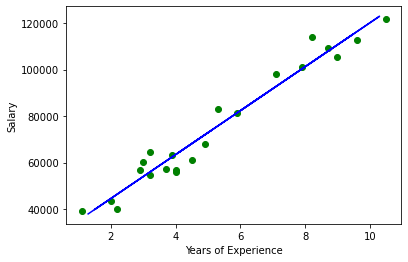

In [13]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_test,y_pred,color='b')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

### Q7 -  Predict delivery time using sorting time 
Input variable = X = Sorting Time, Output variable = Y = Delivery Time

In [14]:
#Read the data
TimeData = pd.read_csv('D:/1.0 Studies/DataScience_Excelr/Assignment6_LinearRegression/delivery_time.csv')
TimeData

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
TimeData.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [16]:
TimeData.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


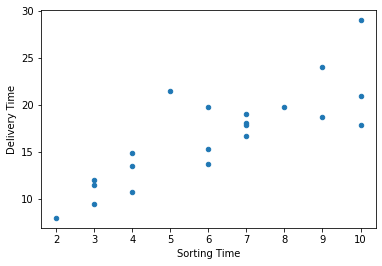

In [17]:
TimeData.plot(kind ='scatter', x='Sorting Time', y='Delivery Time')
plt.show()

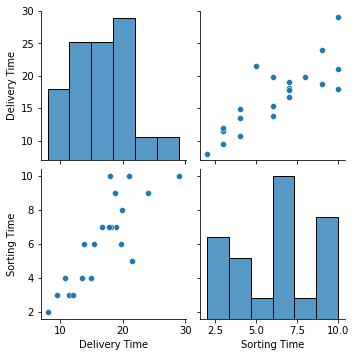

In [18]:
sns.pairplot(TimeData)  #sns.pairplot(TimeData.iloc[:,0:2]) can also be used.

In [35]:
DT = TimeData['Delivery Time']
ST = TimeData['Sorting Time']
linear_model2 = smf.ols("DT~ST", data=TimeData).fit()
linear_model2.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [36]:
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 04 May 2021   Prob (F-statistic):           3.98e-06
Time:                        18:31:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
linear_model2.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
ST,1.108673,2.189367


In [45]:
#Splitting the data for Training and Testing
x2 = np.array(TimeData['Delivery Time']).reshape(-1,1)
y2 = np.array(TimeData['Sorting Time']).reshape(-1,1)

x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.25)
print(x_train2, y_train2)

[[ 8.  ]
 [18.75]
 [12.03]
 [18.11]
 [10.75]
 [17.9 ]
 [11.5 ]
 [17.83]
 [ 9.5 ]
 [16.68]
 [21.5 ]
 [14.88]
 [13.5 ]
 [21.  ]
 [24.  ]] [[ 2]
 [ 9]
 [ 3]
 [ 7]
 [ 4]
 [10]
 [ 3]
 [ 7]
 [ 3]
 [ 7]
 [ 5]
 [ 4]
 [ 4]
 [10]
 [ 9]]


In [46]:
trainmodel2 = lm.fit(x_train2,y_train2)
trainmodel2.score(x_test2,y_test2)

0.23863700550666944

In [48]:
x_test2

array([[15.35],
       [29.  ],
       [19.75],
       [19.  ],
       [13.75],
       [19.83]])

In [47]:
#Testing the model
y_pred2 = trainmodel2.predict(x_test2)
print(y_pred2)

[[ 5.61625654]
 [12.23975548]
 [ 7.75130381]
 [ 7.3873753 ]
 [ 4.83987571]
 [ 7.79012286]]


Text(0, 0.5, 'Delivery Time')

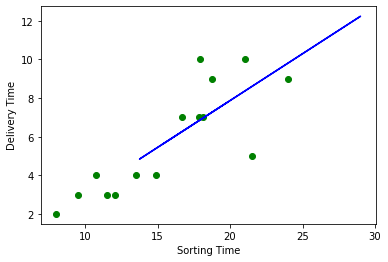

In [49]:
plt.scatter(x_train2,y_train2,color='g')
plt.plot(x_test2,y_pred2,color='b')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")